In [19]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

from PIL import Image
import matplotlib.pyplot as plt

x_train = np.load("MNIST_x_train.npy")

y_train = np.load("MNIST_y_train.npy")

In [27]:
class Encoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        self.encoder = torch.nn.Sequential(
            torch.nn.Linear(28 * 28, 128),
            torch.nn.ReLU(),
            torch.nn.Linear(128, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32, 2),
        )
       
    def forward(self,x):
        y = self.encoder(x)
        return y
        
class Decoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        
        self.decoder = torch.nn.Sequential(
            torch.nn.Linear(2, 32),
            torch.nn.ReLU(),
            torch.nn.Linear(32,128),
            torch.nn.ReLU(),
            torch.nn.Linear(128,28*28),
            
            torch.nn.Sigmoid()
        )
    def forward(self,x):
        y = self.decoder(x)
        return y

In [28]:
from torch.optim import Adam
from torch.nn import MSELoss,BCELoss

# model, optim, loss_fn만들기
# train(): global input tensor,model,optim,loss_fn, hist(loss) 
# visualize(): global input tensor[0:16] -> 출력(16,28*28) ->reshape(-1,28,28) ->imshow()
# visualize2(): global input tensor, model -> encoder model(input) -> 출력 (60000,2) ->[:,0],[:,1] sactter
# visualize3(): hist(loss) plot
x_train = np.reshape(x_train,(-1,28*28))
x_train_ts = torch.tensor(x_train,dtype=torch.float32)

encoder = Encoder()
decoder = Decoder()
optimizer1 = Adam(encoder.parameters(),lr=0.01)
optimizer2 = Adam(decoder.parameters(),lr=0.01)
#loss_fn = MSELoss()
loss_fn = BCELoss()

loss_hist = []
num_epoch=200
def train():
    global x_train_ts,encoder,decoder, optimizer1,optimizer2,loss_fn,num_epoch
    for epoch in range(1,num_epoch+1):
        optimizer1.zero_grad()
        optimizer2.zero_grad()
        en_pred = encoder(x_train_ts)
        de_pred = decoder(en_pred)
        loss =loss_fn(de_pred,x_train_ts)
        loss.backward()
        optimizer1.step()
        optimizer2.step()

        if epoch % (num_epoch//10) ==0:
            print(f"Epoch {epoch}: loss = {loss.item():.4f}")
        
        loss_hist.append(loss.item())


In [29]:
train()

Epoch 20: loss = 0.2609
Epoch 40: loss = 0.2438
Epoch 60: loss = 0.2330
Epoch 80: loss = 0.2208
Epoch 100: loss = 0.2118
Epoch 120: loss = 0.2058
Epoch 140: loss = 0.2022
Epoch 160: loss = 0.1978
Epoch 180: loss = 0.1946
Epoch 200: loss = 0.1918


In [8]:
# visualize(): global input tensor[0:16] -> 출력(16,28*28) ->reshape(-1,28,28) ->imshow()
def visualize():
    global x_train_ts, encoder, decoder
    img_data = x_train_ts[0:16]
    en_pred = encoder(img_data)
    de_pred = decoder(en_pred)
    pred = de_pred.detach().numpy()
    pred = np.reshape(pred,(-1,28,28))
    
    fig,axs = plt.subplots(nrows=2,ncols=8,figsize=(16,4),sharey=True)
    for i in range(2):
        for j in range(8):
            axs[i][j].imshow(pred[i*4+j])

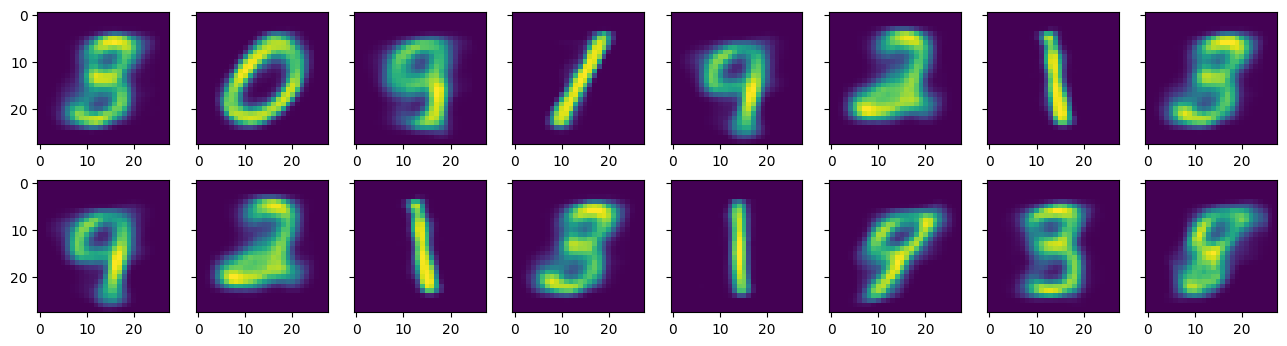

In [30]:
visualize()

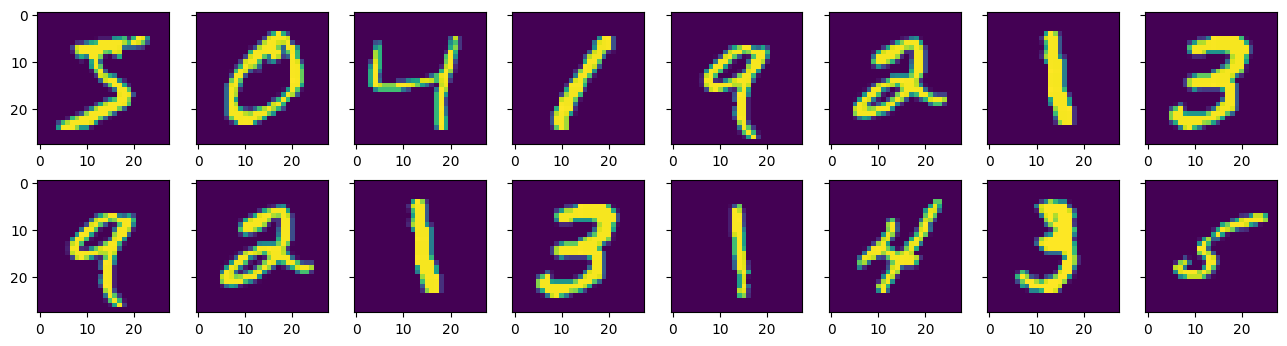

In [12]:
x_train_sub = np.reshape(x_train[0:16],(-1,28,28))
fig_labels,axs_labels = plt.subplots(nrows=2,ncols=8,figsize=(16,4),sharey=True)
for i in range(2):
    for j in range(8):
        axs_labels[i][j].imshow(x_train_sub[i*4+j])

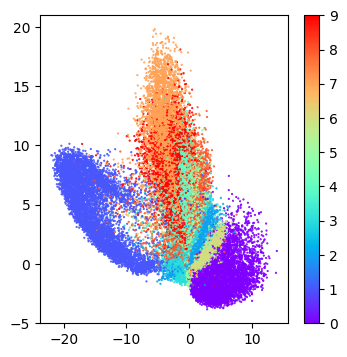

In [31]:
# visualize2(): global input tensor, model -> encoder model(input) -> 출력 (60000,2) ->[:,0],[:,1] sactter

def visualizeMap():
    global x_train_ts,y_train,encoder
    en_pred = encoder(x_train_ts).detach().numpy()

    plt.figure(figsize=(4,4))
    plt.scatter(en_pred[:,0],en_pred[:,1],s=0.3,c=y_train,cmap='rainbow')
    plt.colorbar()
visualizeMap()


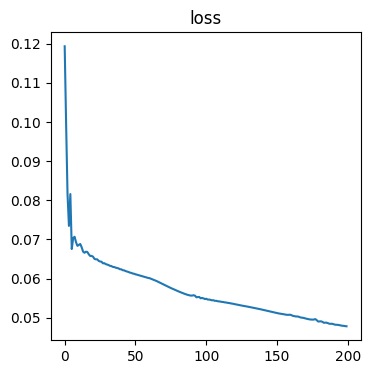

In [24]:
# visualize3(): hist(loss) plot
def visualizeLoss():
    global loss_hist
    plt.figure(figsize=(4,4))
    plt.plot(np.arange(len(loss_hist)),loss_hist)
    plt.title('loss')
visualizeLoss()

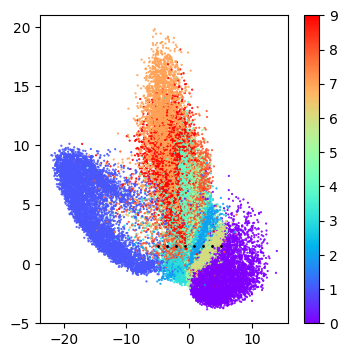

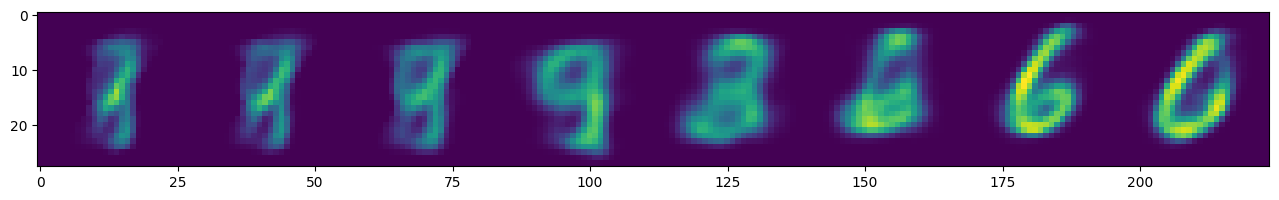

In [44]:
# latent dim walk (-5,1.5) -> (5,1.5) 
# map에 점 찍고, imshow visualize
# decoder 
def visualizeMapUpgrade():
    global x_train_ts,y_train,encoder,decoder
    x_lin = np.linspace(-5.0,5.0,8)
    y_lin = 1.5*np.ones_like(x_lin)
    latent_data = np.stack((x_lin,y_lin),axis=1)
    latent_data_ts = torch.tensor(latent_data,dtype=torch.float)
    en_pred = encoder(x_train_ts).detach().numpy()
    latent_pred = decoder(latent_data_ts).detach().numpy()

    plt.figure(figsize=(4,4))
    plt.scatter(en_pred[:,0],en_pred[:,1],s=0.3,c=y_train,cmap='rainbow')
    plt.colorbar()

    plt.scatter(latent_data[:,0],latent_data[:,1],s=1,c='black')

    plt.figure(figsize=(16,2))
    
    latent_pred = np.reshape(latent_pred,(-1,28,28)).transpose((1,0,2))
    latent_pred = np.reshape(latent_pred,(28,-1))
    plt.imshow(latent_pred)

visualizeMapUpgrade()

In [1]:
import numpy as np
a = np.array([[1,2],[3,4],[5,6]])
print(a.shape,a)
a.transpose((1,0))

(3, 2) [[1 2]
 [3 4]
 [5 6]]


array([[1, 3, 5],
       [2, 4, 6]])